# run cracking

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

from helper_func import *
from cracking import Cracking_Model

import pdb


# case study

In [3]:
class Param: pass
raw_pars = Param()
r0_bar_mean = 5e-3
x_loss_mean = 12.5e-6*0.6 # m
cover_mean = 4e-2
f_t_mean=5.
E_0_mean=32e3

raw_pars.r0_bar = Normal_custom(r0_bar_mean, 0.1*r0_bar_mean, non_negative=True)
raw_pars.x_loss = Normal_custom(x_loss_mean, 0.1*x_loss_mean, non_negative=True)
raw_pars.cover = Normal_custom(cover_mean, 0.1*cover_mean, non_negative=True)
raw_pars.f_t = Normal_custom(f_t_mean, 0.1*f_t_mean, non_negative=True)
raw_pars.E_0 = Normal_custom(E_0_mean, 0.1*E_0_mean, non_negative=True)
raw_pars.w_c = Normal_custom(0.5, 0.1*0.6, non_negative=True)
raw_pars.r_v = Beta_custom(2.96, 2.96*0.05, 3.3, 2.6)  # volumetric expansion rate  2.96 lower 2.6  upper: 3.3



deterministic


/Users/gangli/Local Documents/Mitacs project local/Tinkrete_beta 0.2.1/cracking.py:161: RuntimeWarning: invalid value encountered in greater_equal
  row_mask_1 = ((epsilon_theta >= epsilon_cr).any(axis=1) & (epsilon_theta <= epsilon_cr).any(axis=1))[:, None]
/Users/gangli/Local Documents/Mitacs project local/Tinkrete_beta 0.2.1/cracking.py:161: RuntimeWarning: invalid value encountered in less_equal
  row_mask_1 = ((epsilon_theta >= epsilon_cr).any(axis=1) & (epsilon_theta <= epsilon_cr).any(axis=1))[:, None]
/Users/gangli/Local Documents/Mitacs project local/Tinkrete_beta 0.2.1/cracking.py:172: RuntimeWarning: invalid value encountered in less
  row_mask_2_inverse = ((epsilon_theta) < epsilon_cr).any(axis=1)[:, None]
/Users/gangli/Local Documents/Mitacs project local/Tinkrete_beta 0.2.1/cracking.py:58: RuntimeWarning: invalid value encountered in less_equal
  mask_0 = (epsilon_theta <= epsilon_cr)
/Users/gangli/Local Documents/Mitacs project local/Tinkrete_beta 0.2.1/cracking.py:61: R

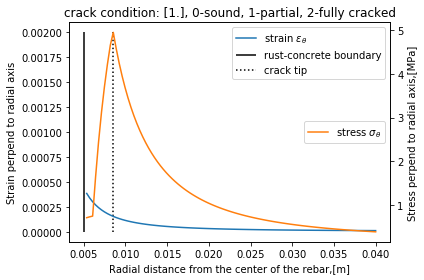

CPU times: user 372 ms, sys: 30.8 ms, total: 403 ms
Wall time: 406 ms


In [4]:
M = Cracking_Model(raw_pars)
# M.run(stochastic=False)
%time M.run(stochastic=False)

In [34]:
M.postproc()
print(M.crack_visible_rate_count)
print(M.R_c - M.pars.r0_bar) #/ M.pars.cover
print(M.pars.cover)

for stochastic solution only
0.0
[       nan 0.00732211 0.00814986 ... 0.00088795 0.00750741 0.00772604]
[0.03179464 0.03190539 0.038883   ... 0.04065779 0.03050404 0.03822862]


(array([29750.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 70250.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

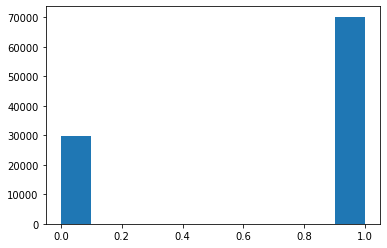

In [35]:
plt.figure()
plt.hist(M.crack_condition)

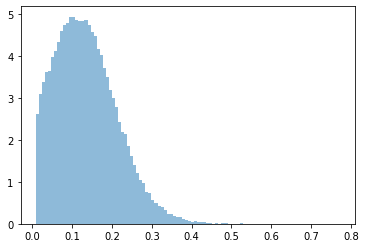

In [36]:
Hist_custom(M.crack_length_over_cover[M.crack_length_over_cover != 0])

In [16]:
M.crack_length_over_cover

array([1., 1., 1., ..., 1., 1., 1.])

In [85]:
s=1000000
np.full((1, s), np.linspace(1, 2, s)).shape

(1, 1000000)

In [86]:
def f(number_of_points=200):
    r = np.full((1, number_of_points), np.linspace(0, 1, number_of_points))
    return r

In [87]:
f().shape

(1, 200)